In [101]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
sns.set_theme()

In [103]:
df = pd.read_csv("../canadian_immegration_data.csv")
top_10 = df.sort_values('Total', ascending=False).head(10).reset_index(drop=True)
top_10

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
1,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
2,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
3,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
4,Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
5,United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
6,Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
7,Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
8,Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581
9,Poland,Europe,Eastern Europe,Developed regions,863,2930,5881,4546,3588,2819,...,1405,1263,1235,1267,1013,795,720,779,852,139241


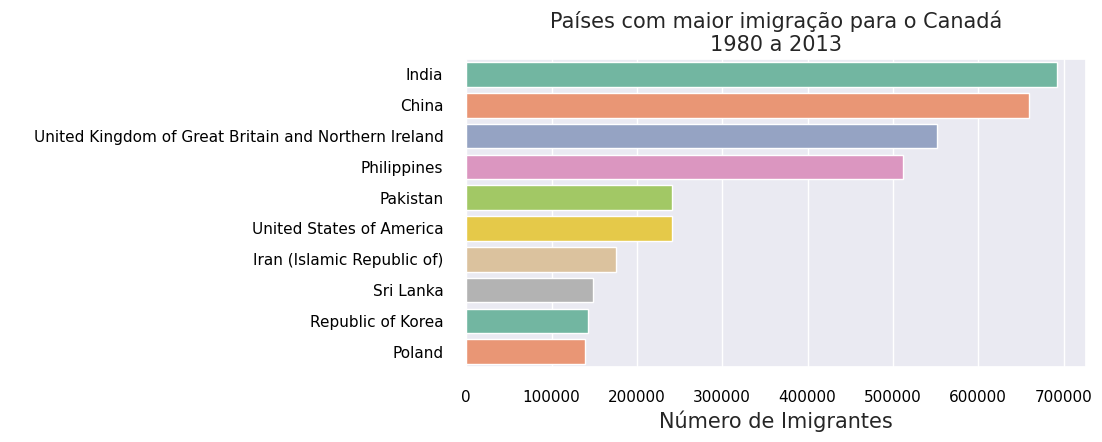

In [104]:
fig, ax = plt.subplots(figsize=(8, 4))

# Define a paleta de cores que será utilizado, para mais paletas de cores acessar, len(top_10) força numero de cores igual numero de dados
# https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
palette_colors = sns.color_palette("Set2", len(top_10))

ax = sns.barplot(
    data=top_10,
    y="Country",
    x="Total",
    orient="h",
    hue="Country",   # usar a mesma variável no hue
    dodge=False,     # evita barras duplicadas
    legend=False,    # esconde legenda repetida
    palette=palette_colors
)

ax.set_title("Países com maior imigração para o Canadá\n1980 a 2013", fontsize=15)
ax.set_xlabel("Número de Imigrantes", fontsize=15)
ax.set_ylabel(" ")
ax.tick_params(length=2, width=1.2, colors='black', size=13)

plt.show()

/tmp/ipykernel_6187/3266463461.py:13: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  ax = sns.barplot(


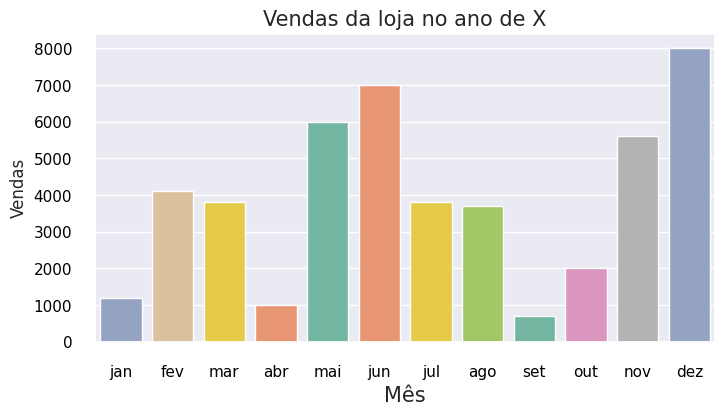

In [105]:
import pandas as pd

meses = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
vendas = [1200, 4100, 3800, 1000, 6000, 7000, 3800, 3700, 700, 2000, 5600, 8000]

df = pd.DataFrame({'mes': meses, 'vendas': vendas})
fig, ax = plt.subplots(figsize=(8, 4))

# Define a paleta de cores que será utilizado, para mais paletas de cores acessar, len(top_10) força numero de cores igual numero de dados
# https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
palette_colors = sns.color_palette("Set2", len(df))

ax = sns.barplot(
    data=df,
    y="vendas",
    x="mes",
    orient="v",
    hue="vendas",   # usar a mesma variável no hue
    dodge=False,     # evita barras duplicadas
    legend=False,    # esconde legenda repetida
    palette=palette_colors
)
ax.set_title("Vendas da loja no ano de X", fontsize=15)
ax.set_xlabel("Mês", fontsize=15)
ax.set_ylabel("Vendas")
ax.tick_params(length=2, width=1.2, colors='black', size=13)

plt.show()


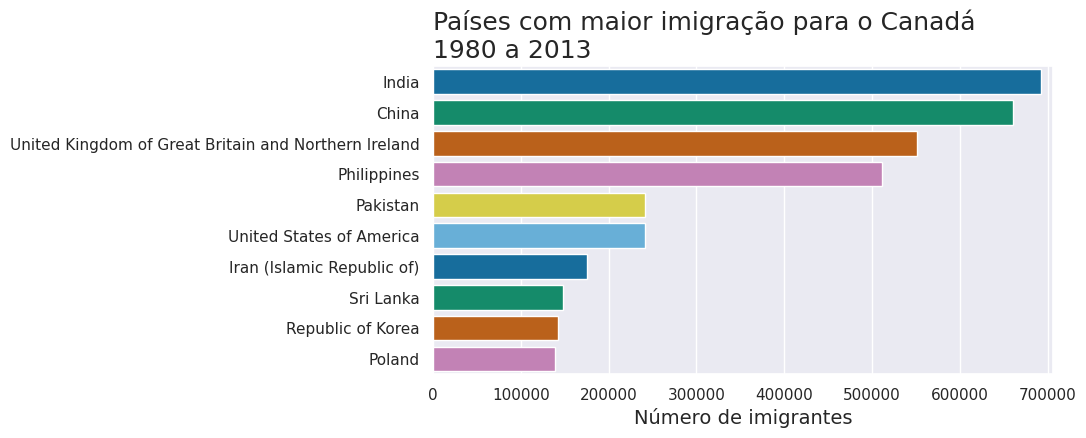

In [106]:
# Irei pegar a função plot paleta e criar uma função com todas paletas disponiveis nativas do Seaborn, com uma função similar ao switch-case do C
# Função deve retornar uma string
def switch_palette(value: int) -> str:
    # Gera um dicionário com todas paletas de cores padrões do seaborn
    colors = list(sns.palettes.SEABORN_PALETTES.keys())
    # Retorna o erro caso o value não seja um inteiro
    if not isinstance(value, int):
        raise TypeError("value deve ser int")
    if 0 <= value < len(colors):
        return colors[value]
    raise IndexError(f"value deve estar em 0..{len(colors)-1}")


def gerar_grafico_paleta(value, 
                         save=False,
                         out_path="../resultados/imigracao.png",
                         dpi=300):
    # Modifica a paleta de acordo com um valor númerico (0, 12)
    palette = switch_palette(value)
    fig, ax = plt.subplots(figsize=(8,4))
    # Cria a paleta de cores com número igual aos dados necessário
    palette_colors = sns.color_palette(palette, len(top_10))
    ax = sns.barplot(
        data=top_10,
        y="Country",
        x="Total",
        orient="h",
        hue="Country",   # usar a mesma variável no hue
        dodge=False,     # evita barras duplicadas
        legend=False,    # esconde legenda repetida
        palette=palette_colors
    )
    ax.margins(x=0.02)
    ax.set_title('Países com maior imigração para o Canadá\n1980 a 2013', loc='left', fontsize=18)
    ax.set_xlabel('Número de imigrantes', fontsize=14)
    ax.set_ylabel('')
    if save:
        fig.savefig(out_path, dpi=dpi, bbox_inches="tight", pad_inches=0.15)
    plt.show()

# Entre com valores entre 0 e 12, onde cada valor é associado a uma paleta de cores diferente
gerar_grafico_paleta(11, save=True)

## Trabalho, gráfico iterativo dos quatro maiores países da América do Sul 
* Países:  Brasil, Argentina, Peru e Colômbia

In [107]:
df = pd.read_csv("../canadian_immegration_data.csv")
# Maiores países da América do Sul
maiores_paises_sul = ["Brazil", "Argentina", "Peru", "Colombia"]
# Sub-dataframe filtrando apenas esses países
df_big_sul = df[df["Country"].isin(maiores_paises_sul)].reset_index(drop=True)

# O antigo formato do dataframe era "wide" onde cada coluna representava uma observação, tendo assim, muitas colunas (largo)
# O Melt transforma esse dataframe com várias colunas numa versão compacta "long", onde cada ano será agora alocado numa única coluna "year"
# E os imigrantes todos alocados numa outra coluna 
df_long = df_big_sul.melt(
    id_vars="Country",         # mantém a coluna Country
    value_vars=[str(y) for y in range(1980, 2014)],  # colunas de anos
    var_name="Year",           # novo nome para os anos
    value_name="Immigrants"    # novo nome para os valores
)
df_long

,Country,Year,Immigrants
0,Argentina,1980,368
1,Brazil,1980,211
2,Colombia,1980,266
3,Peru,1980,317
4,Argentina,1981,426
...,...,...,...
131,Peru,2012,787
132,Argentina,2013,282
133,Brazil,2013,1714
134,Colombia,2013,3631


In [108]:
# Criando dataframe com os valores cumulativos (total) ao longo de cada ano
years = [str(y) for y in range(1980, 2014)]
df_cum_years = df_big_sul[["Country"] + years].copy()
df_cum_years[years] = df_cum_years[years].cumsum(axis=1)

df_long_cumulativo = df_cum_years.melt(
    id_vars="Country",         # mantém a coluna Country
    value_vars=[str(y) for y in range(1980, 2014)],  # colunas de anos
    var_name="Year",           # novo nome para os anos
    value_name="Immigrants"    # novo nome para os valores
)
df_long_cumulativo

,Country,Year,Immigrants
0,Argentina,1980,368
1,Brazil,1980,211
2,Colombia,1980,266
3,Peru,1980,317
4,Argentina,1981,794
...,...,...,...
131,Peru,2012,31970
132,Argentina,2013,19596
133,Brazil,2013,29659
134,Colombia,2013,72088


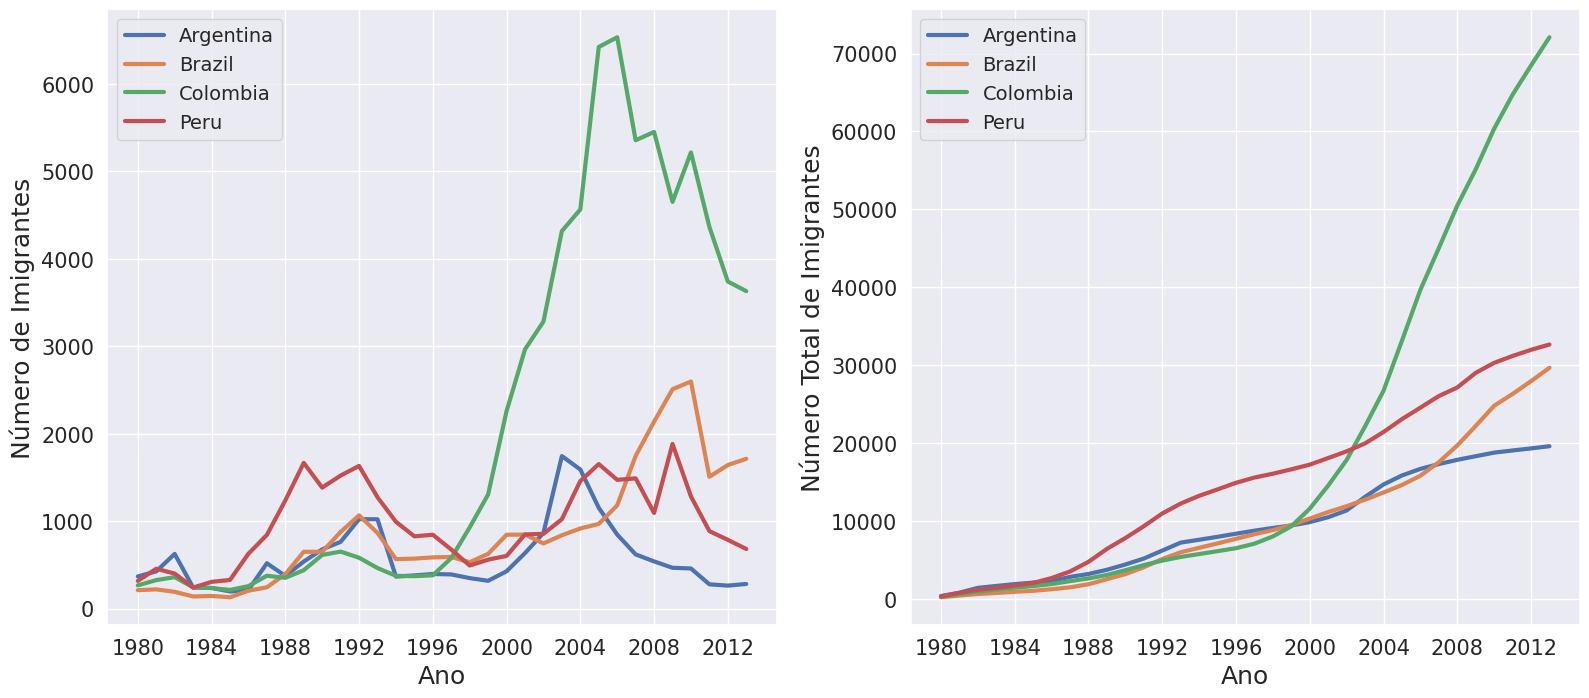

In [127]:
value = 3
palette = switch_palette(value)
palette_colors = sns.color_palette(palette, len(maiores_paises_sul))
fig, axs = plt.subplots(1,2, figsize=(19,8))

sns.lineplot(data=df_long, x="Year", y="Immigrants", hue="Country", ax=axs[0], linewidth=3)
sns.lineplot(data=df_long_cumulativo, x="Year", y="Immigrants", hue="Country", ax=axs[1], linewidth=3)

# Corre sobre os subplots
for ax in axs:
    # Cria os ticks do eixo x com espaçamento de 4 anos de 1980 até 2013
    ax.set_xticks([str(i) for i in np.arange(1980, 2013, 4)])
    ax.legend(fontsize=14)
    ax.set_xlabel("Ano", fontsize=18)
    ax.tick_params(labelsize=15)
axs[0].set_ylabel("Número de Imigrantes", fontsize=18)
axs[1].set_ylabel("Número Total de Imigrantes", fontsize=18)

plt.show()
